# SUNTANS Timor Sea Modelling Setup



In [1]:
from soda.dataio.conversion.demBuilder import demBuilder
from soda.dataio.conversion.dem import blendDEMs, DEM
from soda.utils.maptools import Contour2Shp, utm2ll
from soda.dataio.suntans.sunpy import Grid, Spatial
from soda.dataio.ugrid.uplot import Plot
from soda.utils.otherplot import axcolorbar

import soda.dataio as io
from soda.utils.maptools import ll2utm
from soda.utils.maptools import plotmap

#from mpl_toolkits.basemap import Basemap, cm
from matplotlib.colors import LogNorm, PowerNorm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import matplotlib as mpl
%matplotlib inline
mpl.rcParams['font.size']=14
mpl.rcParams['axes.labelsize']='large'

## Methods: Model Grid(s)


In [2]:
#basedir = r'/home/suntans/Share/ScottReef/DATA'
#basedir='group/mrayson/DATA'
basedir = '../../../DATA/'
bathyfile = r'%s/BATHYMETRY/ETOPO1/ETOPO1_Bed.nc'%basedir


coastfile = r'%s/COAST/GSHHS_shp/i/GSHHS_i_L1.shp'%basedir



In [3]:
#gridname = 'TimorSea_15_5k'
#suntanspath = '../SCENARIOS/OUTPUT_TimorSea_5k_tri/TimorSea_15_5k_200908_surface.nc'

gridname = 'NWS_15_2k_hex'
suntanspath = '../GRIDS/%s/'%gridname
#suntanspath = '../SCENARIOS/OUTPUT_TimorSea_2k_tri/nobeta/TimorSea_15_2k_200908_surface.nc'
projstr='merc'

grd = Grid(suntanspath, projstr=projstr)
#grd.to_wgs84(utmzone, isnorth)

hgrd = grd.convert2hybrid()
dgall = hgrd.dg[hgrd.face]
dgface = dgall.mean(axis=1)

# Convert the projection
grd.xp, grd.yp = grd.to_latlon(grd.xp,grd.yp)
#grd.xv, grd.yv = grd.to_latlon(grd.xv, grd.yv)
grd.xy = grd.cellxy(grd.xp, grd.yp)

grd.xlims = [grd.xp.min(), grd.xp.max()]
grd.ylims = [grd.yp.min(), grd.yp.max()]

# Load the bathy data
grd.dv = grd.loadBathy('%s/depths.dat-voro'%suntanspath)

Warning could not find vertspace.dat in folder, setting Nkmax=1


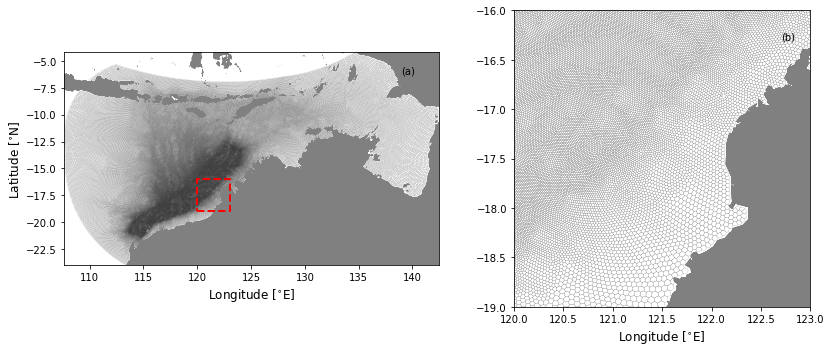

In [4]:
zoom2 = [120., 123., -19., -16.]
bbox_x = [zoom2[0], zoom2[1], zoom2[1], zoom2[0], zoom2[0]]
bbox_y = [zoom2[2], zoom2[2], zoom2[3], zoom2[3], zoom2[2]]

plt.figure(figsize=(12,5))
ax1=plt.subplot(1,2,1)
grd.plotmesh(edgecolors='k',linewidths=0.05)

plt.plot(bbox_x, bbox_y ,'r--',linewidth=2)
#plt.xticks(rotation=22)

ax, coll = plotmap(coastfile, fieldname=None)
coll.set_linewidths(0.2)

plt.ylabel('Latitude [$^{\circ}$N]')
plt.xlabel('Longitude [$^{\circ}$E]')
plt.text(0.9,0.9,'(a)',transform=ax1.transAxes)

ax2=plt.subplot(1,2,2)
grd.plotmesh(linewidths=0.1)
plt.axis(zoom2)

ax, coll = plotmap(coastfile, fieldname=None)
coll.set_linewidths(0.2)

#plt.ylabel('Latitude [$^{\circ}$N]')
plt.xlabel('Longitude [$^{\circ}$E]')
plt.tight_layout()
plt.text(0.9,0.9,'(b)',transform=ax2.transAxes)

plt.savefig('../FIGURES/MeshOverview_%s.png'%gridname, dpi=150)

Calculating dg...
(679391, 2)


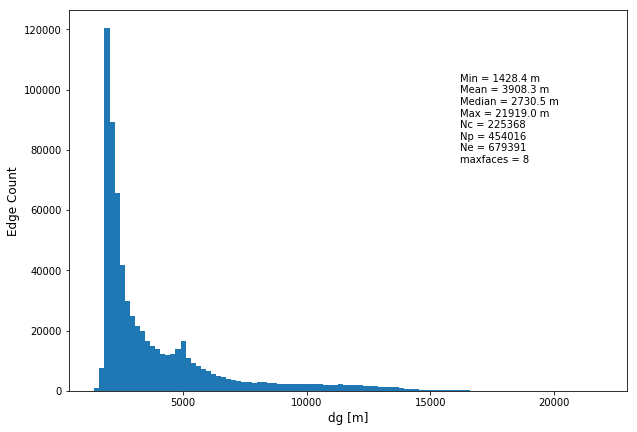

In [5]:
# Histogram plot of each grid
plt.figure(figsize=(10,7))
grd.plothist()
#plt.title('Tri 250 m')

plt.savefig('../FIGURES/GridStats_%s.png'%gridname, dpi=150)

In [6]:
# Create a plot object
p = Plot(grd.xp, grd.yp, hgrd.cells, nfaces=hgrd.nfaces)
#pxy = Plot(hgrd.xp, hgrd.yp, hgrd.cells, nfaces=hgrd.nfaces) # Scale distance to km

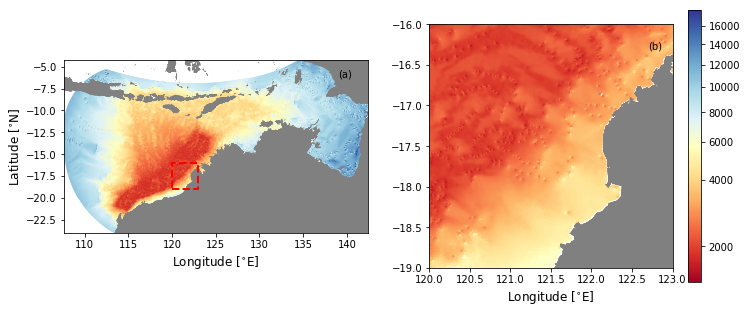

In [7]:
# Plot the grid resolution
plt.figure(figsize=(12,5))
ax1=plt.subplot(1,2,1)

p.clim = [0.,10000.]
h = p.plotcelldata(dgface, cmap='RdYlBu', norm=PowerNorm(gamma=1/2.), colorbar=False)
#p.plotedgedata(hgrd.xe*0, cmap='gray', colorbar=False, linewidths=0.2)
#plt.plot(llbox[:,0], llbox[:,1],'m--',linewidth=2.)
plt.plot(bbox_x, bbox_y ,'r--',linewidth=2)

plt.xlabel('Longitude [$^{\circ}$E]')
plt.ylabel('Latitude [$^{\circ}$N]')
plt.text(0.9,0.9,'(a)',transform=ax1.transAxes)
ax, coll = plotmap(coastfile, fieldname=None)
coll.set_linewidths(0.2)


ax2=plt.subplot(1,2,2)
h = p.plotcelldata(dgface, cmap='RdYlBu', norm=PowerNorm(gamma=1/2.), colorbar=True)
plt.xlabel('Longitude [$^{\circ}$E]')
plt.axis(zoom2)
plt.text(0.9,0.9,'(b)',transform=ax2.transAxes)
ax, coll = plotmap(coastfile, fieldname=None)
coll.set_linewidths(0.2)

plt.savefig('../FIGURES/MeshResolution_%s.png'%gridname, dpi=150)

In [16]:
# WA-IMOS location (August 2019)
sites = {
'NIN100':{'y':-21.84986667,'x':113.9064667},
'NWSBAR':{'y':-20.76128333,'x':114.7586167},
'NWSROW':{'y':-17.75801667,'x':119.9061},
'NWSBRW':{'y':-14.23543333,'x':123.1623833},
'NWSLYN':{'y':-9.939416667,'x':130.3490833},
}

 

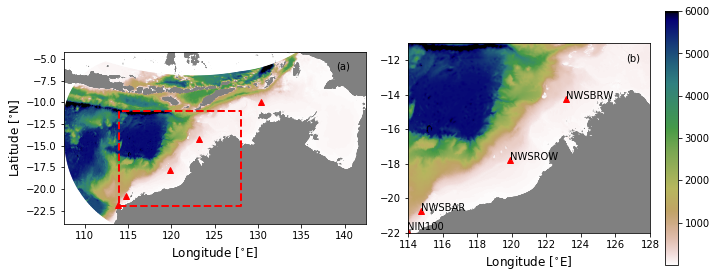

In [19]:
#zoom2 = [118., 128., -18., -11.]
zoom2 = [114., 128., -22., -11.]

#zoom2 = [118., 120., -18., -16.]

bbox_x = [zoom2[0], zoom2[1], zoom2[1], zoom2[0], zoom2[0]]
bbox_y = [zoom2[2], zoom2[2], zoom2[3], zoom2[3], zoom2[2]]
# Plot the topography

# Plot the grid resolution
plt.figure(figsize=(10,4))
ax1=plt.subplot(1,2,1)

p.clim = [-200.,6000.]
h = p.plotcelldata(grd.dv, cmap='gist_earth_r', colorbar=False)
#p.plotedgedata(hgrd.xe*0, cmap='gray', colorbar=False, linewidths=0.2)
#plt.plot(llbox[:,0], llbox[:,1],'m--',linewidth=2.)
plt.plot(bbox_x, bbox_y ,'r--',linewidth=2)

plt.xlabel('Longitude [$^{\circ}$E]')
plt.ylabel('Latitude [$^{\circ}$N]')
plt.text(0.9,0.9,'(a)',transform=ax1.transAxes)
ax, coll = plotmap(coastfile, fieldname=None)
coll.set_linewidths(0.2)
for ss in sites.keys():
    plt.plot(sites[ss]['x'],sites[ss]['y'],'r^')
    #plt.text(sites[ss]['x'],sites[ss]['y'],ss)

ax2=plt.subplot(1,2,2)
h = p.plotcelldata(grd.dv, cmap='gist_earth_r', colorbar=True)
plt.xlabel('Longitude [$^{\circ}$E]')
plt.axis(zoom2)
plt.text(0.9,0.9,'(b)',transform=ax2.transAxes)
ax, coll = plotmap(coastfile, fieldname=None)
coll.set_linewidths(0.2)

for ss in sites.keys():
    plt.plot(sites[ss]['x'],sites[ss]['y'],'r^')
    if 'LYN' in ss:
        continue
    else:
        plt.text(sites[ss]['x'],sites[ss]['y'],ss)

plt.tight_layout()
#plt.savefig('../FIGURES/MeshDepths_%s.png'%gridname, dpi=150)
plt.savefig('../FIGURES/MeshDepths_wIMOS_%s.png'%gridname, dpi=150)

In [10]:
# Plot the IMOS stations on the map 
from soda.dataio.netcdfio import returnQuery

dbfile = '%s/FIELD/UWAOceanDynamics.sqlite'%basedir

qstr = '(StationName LIKE "%PIL%" OR StationName LIKE "%KIM%" OR StationName LIKE "%ITFTIS%" OR StationName LIKE "%ITFMHB%") \
    AND height_start < 30. AND Variable_Name LIKE "%waterlevel%"'

query = returnQuery(dbfile,['lon_start','lat_start','StationID'],\
        'observations', qstr)

coords = np.array([query['lon_start'], query['lat_start']])


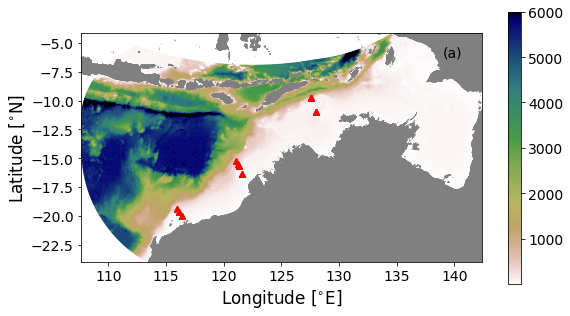

In [11]:
plt.figure(figsize=(9,5))
ax1=plt.subplot(1,1,1)

p.clim = [-200.,6000.]
h = p.plotcelldata(grd.dv, cmap='gist_earth_r', colorbar=True)

#plt.plot(bbox_x, bbox_y ,'r--',linewidth=2)

plt.xlabel('Longitude [$^{\circ}$E]')
plt.ylabel('Latitude [$^{\circ}$N]')
plt.text(0.9,0.9,'(a)',transform=ax1.transAxes)
ax, coll = plotmap(coastfile, fieldname=None)
coll.set_linewidths(0.2)

plt.plot(coords[0,:],coords[1,:],'r^')

plt.savefig('../FIGURES/IMOS_Stations_%s.png'%gridname, dpi=150)

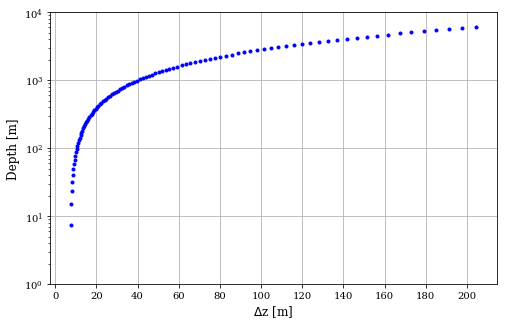

In [4]:
# Plot the vertical grid space
dz = grd.calcVertSpace(100,1.034,6000.)
z = np.cumsum(dz)

plt.figure(figsize=(8,5))
plt.semilogy(dz,z,'b.')
plt.ylabel('Depth [m]')
plt.xlabel('$\Delta$z [m]')
plt.grid(b=True)
plt.ylim(1,1e4)
plt.xticks(np.arange(0,220,20.))

plt.savefig('../FIGURES/Vert_Grid_Spacing.png', dpi=150)

([<matplotlib.axis.XTick at 0x7ff9c0301ba8>,
 <a list of 11 Text xticklabel objects>)

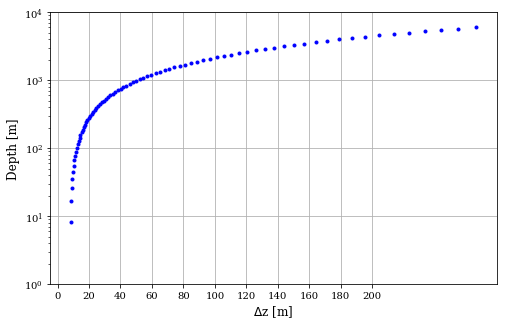

In [7]:
# Plot the vertical grid space
dz = grd.calcVertSpace(80,1.045,6000.)
z = np.cumsum(dz)

plt.figure(figsize=(8,5))
plt.semilogy(dz,z,'b.')
plt.ylabel('Depth [m]')
plt.xlabel('$\Delta$z [m]')
plt.grid(b=True)
plt.ylim(1,1e4)
plt.xticks(np.arange(0,220,20.))